In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import re
import os
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib import cm

In [2]:
dir = 'N:/isipd/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/ground_T/'

In [3]:
daily_ground_T = pd.read_csv(dir + 'daily_ground_T.csv')
daily_ground_T

,Date/Time,0.5 m,1.0 m,1.5 m,2.0 m,4.0 m,7.0 m,12.0 m,20.0 m
0,2018/Aug/20 19:00:00,-0.0290,-0.9478,-2.0841,-3.9305,-4.9152,-5.2814,-5.2272,-5.3055
1,2018/Aug/21 03:00:00,0.0072,-0.9165,-2.2813,-4.2503,-5.1439,-5.4167,-5.3351,-5.3233
2,2018/Aug/21 11:00:00,0.0040,-0.9145,-2.2778,-4.2531,-5.1415,-5.4169,-5.3362,-5.3233
3,2018/Aug/21 19:00:00,2.4155,-0.1402,-1.6589,-3.9183,-5.0017,-5.4254,-5.3431,-5.3149
4,2018/Aug/22 03:00:00,1.6991,-0.1433,-1.6537,-3.9121,-4.9976,-5.4233,-5.3443,-5.3156
...,...,...,...,...,...,...,...,...,...
13248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
mean20 = daily_ground_T['20.0 m'].mean()
min20 = daily_ground_T['20.0 m'].min()
max20 = daily_ground_T['20.0 m'].max()
print(mean20, min20, max20)

-5.252677168307548 -5.359 -5.1064


In [5]:
daily_ground_T.iloc[:, 0] = pd.to_datetime(daily_ground_T.iloc[:, 0])
print(daily_ground_T.iloc[:, 0].head())
daily_ground_T.set_index(daily_ground_T.columns[0], inplace=True)
print(daily_ground_T.index)


0    2018-08-20 19:00:00
1    2018-08-21 03:00:00
2    2018-08-21 11:00:00
3    2018-08-21 19:00:00
4    2018-08-22 03:00:00
Name: Date/Time, dtype: object
DatetimeIndex(['2018-08-20 19:00:00', '2018-08-21 03:00:00',
               '2018-08-21 11:00:00', '2018-08-21 19:00:00',
               '2018-08-22 03:00:00', '2018-08-22 11:00:00',
               '2018-08-22 19:00:00', '2018-08-23 03:00:00',
               '2018-08-23 11:00:00', '2018-08-23 19:00:00',
               ...
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT'],
              dtype='datetime64[ns]', name='Date/Time', length=13253, freq=None)


c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [6]:
daily_ground_T = daily_ground_T.dropna()


In [7]:
print(daily_ground_T.loc['2020-08-21T11:00:00.000':'2022-08-21T11:00:00.000'])  # Slice directly to see output


                      0.5 m   1.0 m   1.5 m   2.0 m   4.0 m   7.0 m  12.0 m  \
Date/Time                                                                     
2020-08-21 11:00:00  1.0580 -0.8125 -2.4790 -4.7496 -5.7360 -5.8709 -5.4654   
2020-08-21 19:00:00  1.0695 -0.8083 -2.4710 -4.7418 -5.7297 -5.8701 -5.4660   
2020-08-22 03:00:00  1.0721 -0.8036 -2.4614 -4.7302 -5.7236 -5.8675 -5.4667   
2020-08-22 11:00:00  1.0973 -0.8000 -2.4544 -4.7221 -5.7164 -5.8661 -5.4679   
2020-08-22 19:00:00  1.1069 -0.7959 -2.4471 -4.7132 -5.7098 -5.8643 -5.4683   
...                     ...     ...     ...     ...     ...     ...     ...   
2022-08-20 03:00:00  1.3683 -0.7708 -2.4974 -4.8862 -5.9413 -6.0743 -5.6217   
2022-08-20 11:00:00  1.2352 -0.7666 -2.4919 -4.8803 -5.9188 -6.0731 -5.6221   
2022-08-20 19:00:00  1.1974 -0.7586 -2.4774 -4.8539 -5.9296 -6.0710 -5.6226   
2022-08-21 03:00:00  1.1033 -0.7579 -2.4803 -4.8669 -5.9118 -6.0688 -5.6236   
2022-08-21 11:00:00  1.0801 -0.7509 -2.4630 -4.8355 

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_36872\2621374230.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab10', len(daily_ground_T_subset.columns[0:8]))


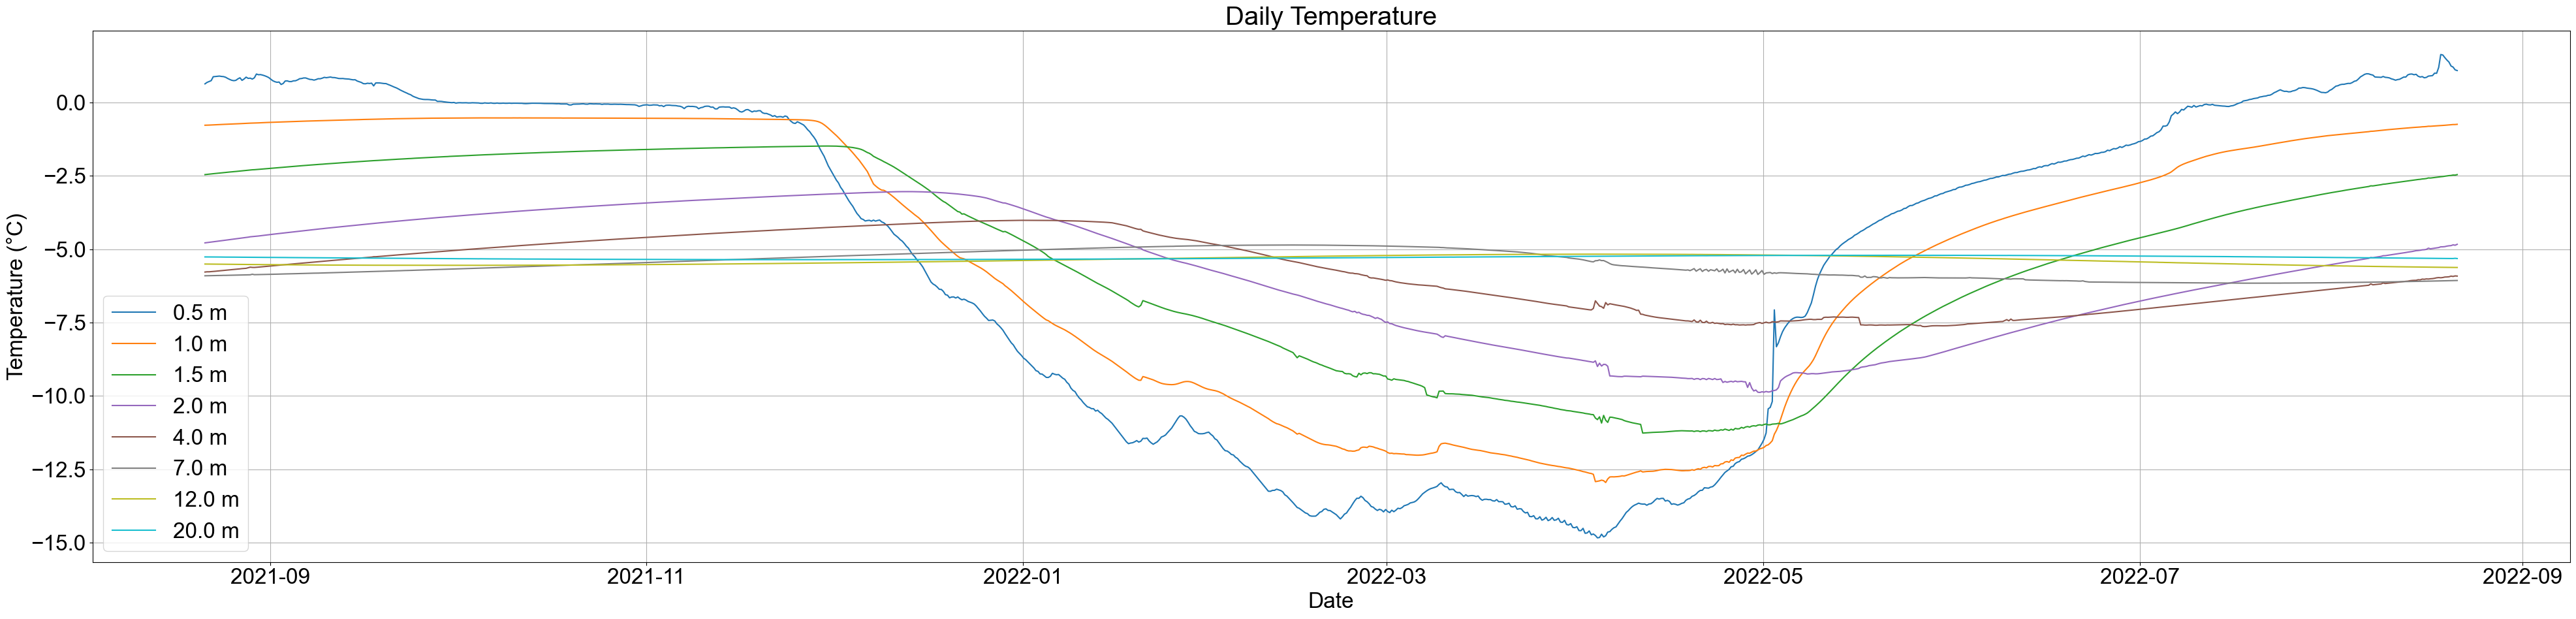

In [30]:
plt.figure(figsize=(40, 10))
plt.rcParams['font.size'] = 24
plt.rcParams['font.family'] = 'Arial'
plt.style.use('seaborn-v0_8-colorblind')


daily_ground_T_subset = daily_ground_T['2021-08-21T11:00:00.000':'2022-08-21T11:00:00.000']

#daily_ground_T_subset = daily_ground_T['2018-08-22T11:00:00.000':'2019-07-4T11:00:00.000']
colormap = cm.get_cmap('tab10', len(daily_ground_T_subset.columns[0:8]))

for i, depth in enumerate(daily_ground_T_subset.columns[0:8]):
    plt.plot(
        daily_ground_T_subset.index, 
        daily_ground_T_subset[depth], 
        linestyle='-', 
        label=depth, 
        color=colormap(i)  # Assign color from colormap
    )

# Get the current axes and set locators and formatters
ax = plt.gca()
#ax.set_xlim(pd.to_datetime('2018/Aug/20 19:00:00'), pd.to_datetime('2022/Aug/21 11:00:00'))
#ax.xaxis.set_major_locator(MonthLocator(interval=3))
#ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# Customize the plot
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperature')
plt.grid(True)
plt.legend()

plt.tight_layout()

In [31]:
daily_ground_T_subset


,0.5 m,1.0 m,1.5 m,2.0 m,4.0 m,7.0 m,12.0 m,20.0 m
Date/Time,,,,,,,,
2021-08-21 11:00:00,0.6273,-0.7816,-2.4626,-4.7862,-5.7795,-5.9071,-5.5072,-5.2649
2021-08-21 19:00:00,0.6766,-0.7797,-2.4556,-4.7773,-5.7715,-5.9052,-5.5080,-5.2652
2021-08-22 03:00:00,0.7058,-0.7769,-2.4476,-4.7691,-5.7714,-5.9031,-5.5086,-5.2662
2021-08-22 11:00:00,0.7361,-0.7732,-2.4404,-4.7595,-5.7656,-5.9023,-5.5104,-5.2665
2021-08-22 19:00:00,0.8693,-0.7697,-2.4322,-4.7502,-5.7581,-5.9007,-5.5106,-5.2669
...,...,...,...,...,...,...,...,...
2022-08-20 03:00:00,1.3683,-0.7708,-2.4974,-4.8862,-5.9413,-6.0743,-5.6217,-5.3188
2022-08-20 11:00:00,1.2352,-0.7666,-2.4919,-4.8803,-5.9188,-6.0731,-5.6221,-5.3182
2022-08-20 19:00:00,1.1974,-0.7586,-2.4774,-4.8539,-5.9296,-6.0710,-5.6226,-5.3191


            min     max      mean
0.5 m  -14.8287  1.6251 -5.034619
1.0 m  -12.9446 -0.5320 -5.143924
1.5 m  -11.2620 -1.4896 -5.365833
2.0 m   -9.8781 -3.0414 -5.903086
4.0 m   -7.6374 -4.0183 -5.838810
7.0 m   -6.1588 -4.8593 -5.561309
12.0 m  -5.6245 -5.1709 -5.391667
20.0 m  -5.3590 -5.2092 -5.287852
            min     max      mean  Depth
0.5 m  -14.8287  1.6251 -5.034619    0.5
1.0 m  -12.9446 -0.5320 -5.143924    1.0
1.5 m  -11.2620 -1.4896 -5.365833    1.5
2.0 m   -9.8781 -3.0414 -5.903086    2.0
4.0 m   -7.6374 -4.0183 -5.838810    4.0
7.0 m   -6.1588 -4.8593 -5.561309    7.0
12.0 m  -5.6245 -5.1709 -5.391667   12.0
20.0 m  -5.3590 -5.2092 -5.287852   20.0


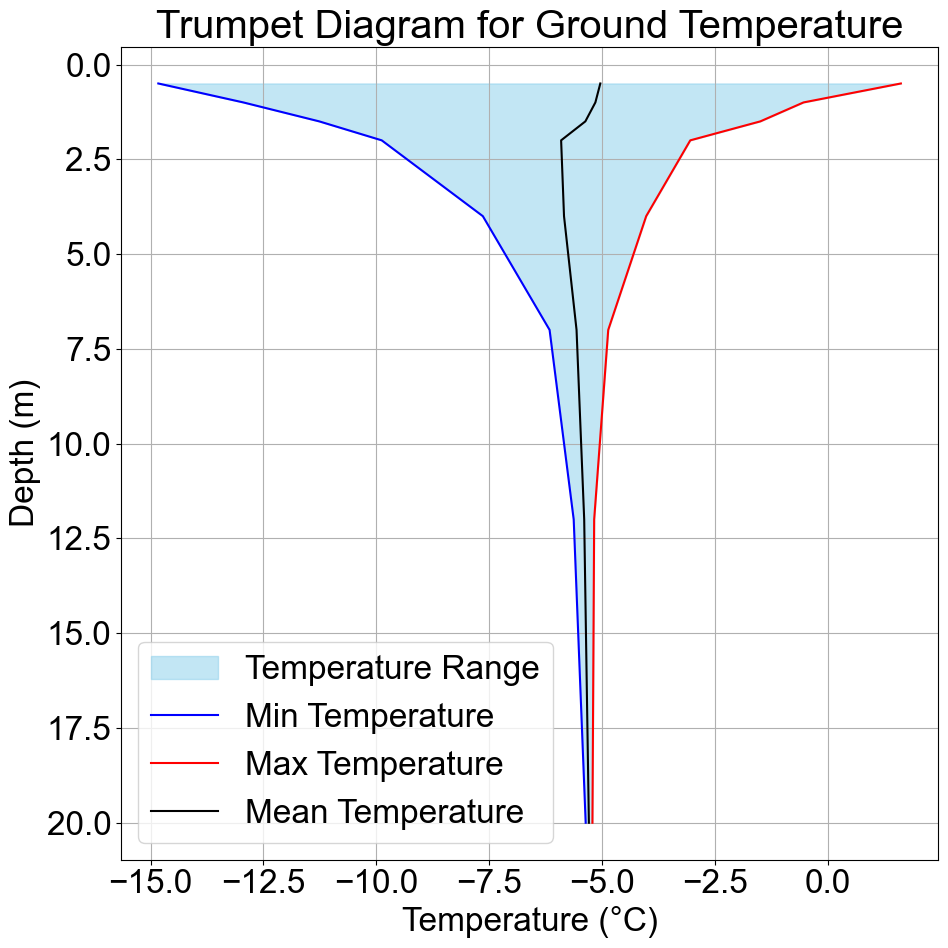

In [32]:
# Calculate min and max temperature for each depth
trumpet_data = daily_ground_T_subset.iloc[:, :].agg(['min', 'max', 'mean']).transpose()
print(trumpet_data)
trumpet_data['Depth'] = trumpet_data.index.str.replace(' m', '').astype(float)
print(trumpet_data)
# Set up plot
plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = 24
plt.rcParams['font.family'] = 'Arial'
plt.style.use('seaborn-v0_8-colorblind')

# Plot trumpet
plt.fill_betweenx(
    trumpet_data['Depth'],  # Depth (y-axis)
    trumpet_data['min'],  # Min temperature (left bound)
    trumpet_data['max'],  # Max temperature (right bound)
    color='skyblue', alpha=0.5, label='Temperature Range'
)

# Overlay min and max lines
plt.plot(trumpet_data['min'], trumpet_data['Depth'], color='blue', label='Min Temperature')
plt.plot(trumpet_data['max'], trumpet_data['Depth'], color='red', label='Max Temperature')
plt.plot(trumpet_data['mean'], trumpet_data['Depth'], color='black', label='Mean Temperature')
# Invert depth axis (optional for geophysical conventions)
plt.gca().invert_yaxis()

# Customize plot
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')
plt.title('Trumpet Diagram for Ground Temperature')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display plot
plt.show()

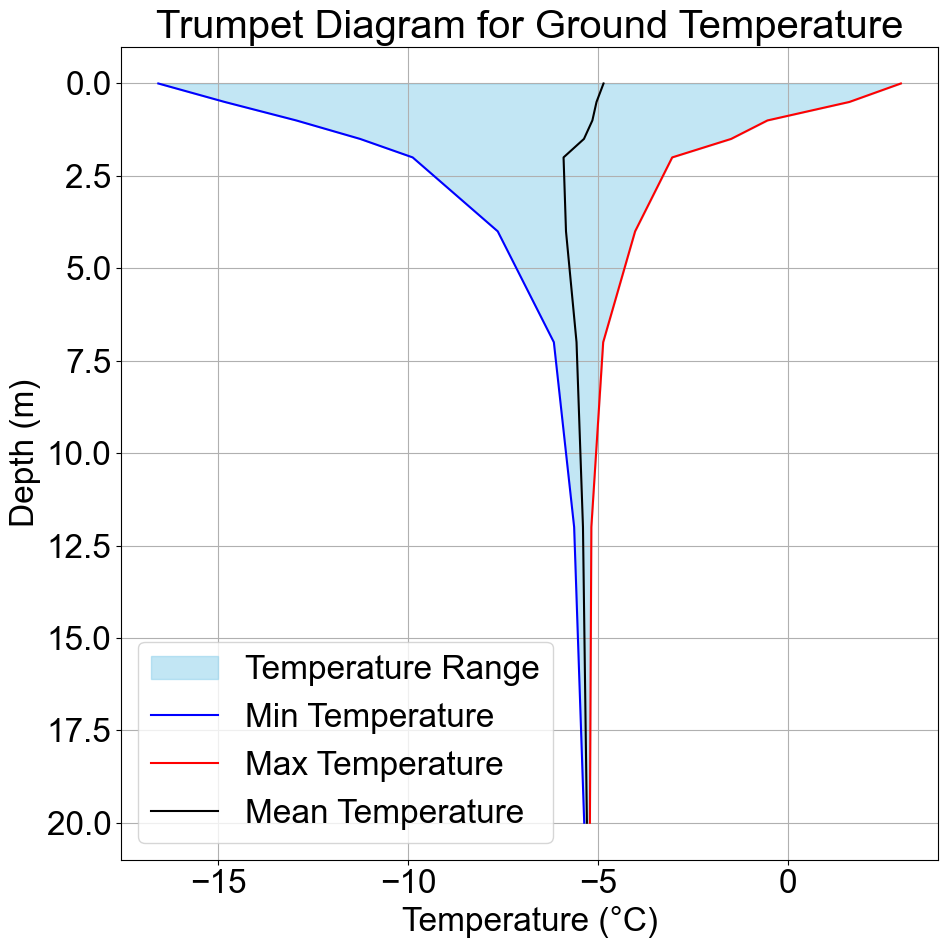

In [33]:
import numpy as np
from scipy.interpolate import interp1d

# Prepare data
trumpet_data = daily_ground_T_subset.iloc[:, :].agg(['min', 'max', 'mean']).transpose()
trumpet_data['Depth'] = trumpet_data.index.str.replace(' m', '').astype(float)

# Calculate min, max, and mean for each depth


# Linear extrapolation for 0 m depth
shallow_depths = trumpet_data['Depth'][:3]  # Use the first 3 depths for fitting
mean_temps = trumpet_data['mean'][:3]  # Corresponding mean temperatures

# Fit a linear model
coeffs = np.polyfit(shallow_depths, mean_temps, 1)  # Fit a line: y = mx + b
extrapolated_temp = np.polyval(coeffs, 0)  # Evaluate at depth 0

# Add extrapolated temperature to the DataFrame using pd.concat
extrapolated_row = pd.DataFrame({
    'Depth': [0],
    'min': [np.polyval(np.polyfit(shallow_depths, trumpet_data['min'][:3], 1), 0)],
    'max': [np.polyval(np.polyfit(shallow_depths, trumpet_data['max'][:3], 1), 0)],
    'mean': [extrapolated_temp]
})

# Concatenate the new row to the existing DataFrame
trumpet_data = pd.concat([trumpet_data, extrapolated_row], ignore_index=True)

# Sort by depth
trumpet_data = trumpet_data.sort_values(by='Depth')

# Plot updated data
plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = 24
plt.rcParams['font.family'] = 'Arial'
plt.style.use('seaborn-v0_8-colorblind')

# Plot trumpet diagram
plt.fill_betweenx(
    trumpet_data['Depth'],  # Depth (y-axis)
    trumpet_data['min'],  # Min temperature (left bound)
    trumpet_data['max'],  # Max temperature (right bound)
    color='skyblue', alpha=0.5, label='Temperature Range'
)

# Overlay min, max, and mean lines
plt.plot(trumpet_data['min'], trumpet_data['Depth'], color='blue', label='Min Temperature')
plt.plot(trumpet_data['max'], trumpet_data['Depth'], color='red', label='Max Temperature')
plt.plot(trumpet_data['mean'], trumpet_data['Depth'], color='black', label='Mean Temperature')

# Invert depth axis (optional)
plt.gca().invert_yaxis()

# Customize plot
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')
plt.title('Trumpet Diagram for Ground Temperature')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display plot
plt.show()

In [27]:
print(trumpet_data)

       min     max      mean  Depth
8 -20.9506  7.4514 -4.906227    0.0
0 -18.0600  5.4159 -5.010006    0.5
1 -13.4694 -0.0720 -4.980966    1.0
2 -11.4288 -0.3813 -5.151155    1.5
3  -9.8781 -1.7015 -5.573262    2.0
4  -7.6374 -3.6243 -5.516481    4.0
5  -6.1588 -4.5456 -5.333993    7.0
6  -5.6245 -4.9793 -5.276145   12.0
7  -5.3590 -5.1064 -5.252648   20.0


Depth of Zero Annual Amplitude (DZAA): 20.00 m


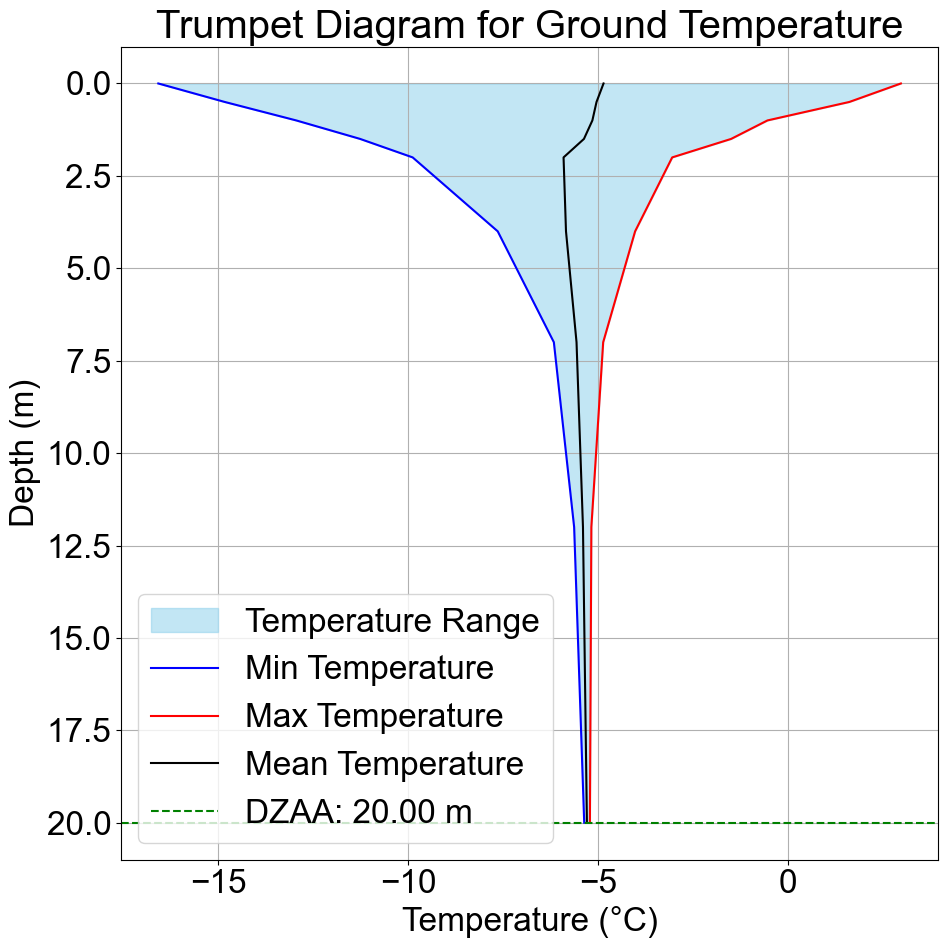

In [34]:
# Calculate temperature amplitude
trumpet_data['amplitude'] = (trumpet_data['max'] - trumpet_data['min']) / 2

# Define threshold for zero amplitude
amplitude_threshold = 0.1  # Adjust based on the desired precision

# Find the depth where amplitude falls below the threshold
dzaa_row = trumpet_data[trumpet_data['amplitude'] <= amplitude_threshold].iloc[0]
dzaa_depth = dzaa_row['Depth']

print(f"Depth of Zero Annual Amplitude (DZAA): {dzaa_depth:.2f} m")

# Visualize DZAA on the trumpet plot
plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = 24
plt.rcParams['font.family'] = 'Arial'
plt.style.use('seaborn-v0_8-colorblind')

# Plot trumpet
plt.fill_betweenx(
    trumpet_data['Depth'],
    trumpet_data['min'],
    trumpet_data['max'],
    color='skyblue', alpha=0.5, label='Temperature Range'
)

plt.plot(trumpet_data['min'], trumpet_data['Depth'], color='blue', label='Min Temperature')
plt.plot(trumpet_data['max'], trumpet_data['Depth'], color='red', label='Max Temperature')
plt.plot(trumpet_data['mean'], trumpet_data['Depth'], color='black', label='Mean Temperature')

# Highlight DZAA
plt.axhline(dzaa_depth, color='green', linestyle='--', label=f'DZAA: {dzaa_depth:.2f} m')

# Invert depth axis
plt.gca().invert_yaxis()

# Customize plot
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')
plt.title('Trumpet Diagram for Ground Temperature')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display plot
plt.show()

Depth of Zero Annual Amplitude (DZAA): 18.68 m


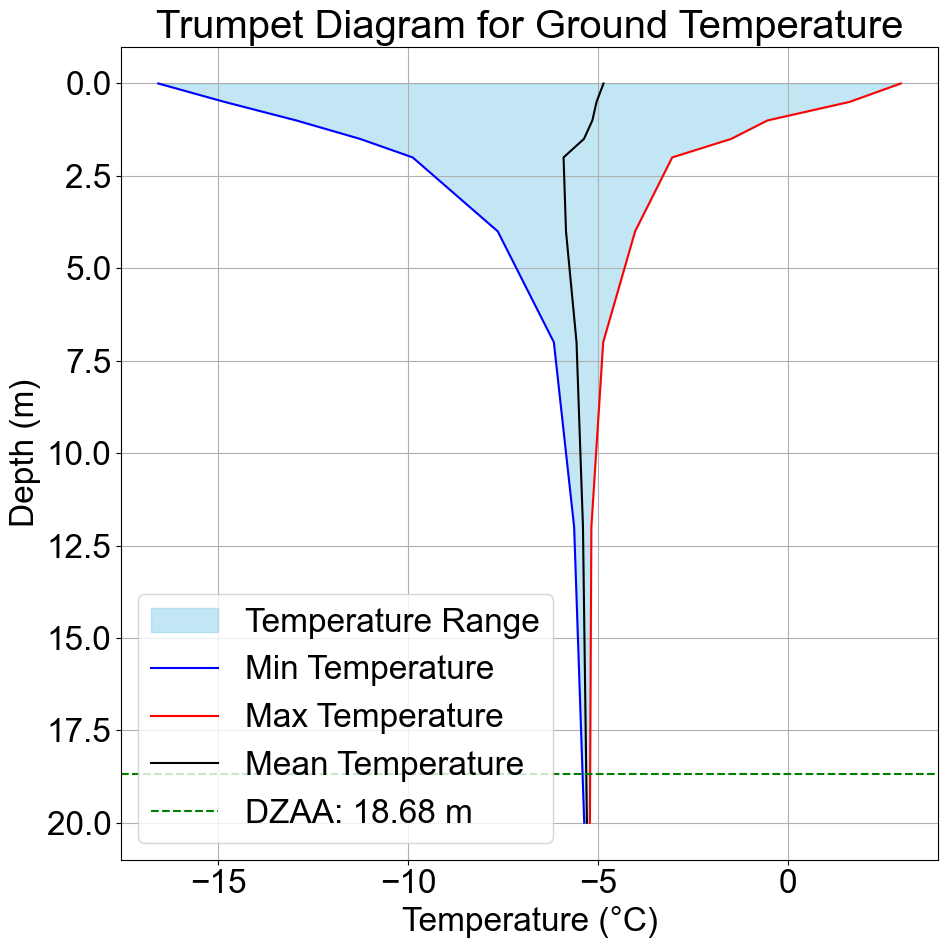

In [35]:
# Calculate temperature amplitude
trumpet_data['amplitude'] = (trumpet_data['max'] - trumpet_data['min']) / 2

# Define threshold for zero amplitude
amplitude_threshold = 0.1  # Adjust based on the desired precision

# Find bounding depths
above_threshold = trumpet_data[trumpet_data['amplitude'] > amplitude_threshold]
below_threshold = trumpet_data[trumpet_data['amplitude'] <= amplitude_threshold]

if not below_threshold.empty:
    z1 = above_threshold.iloc[-1]['Depth']
    z2 = below_threshold.iloc[0]['Depth']
    A1 = above_threshold.iloc[-1]['amplitude']
    A2 = below_threshold.iloc[0]['amplitude']
    
    # Interpolate for DZAA
    dzaa_depth = z1 + ((amplitude_threshold - A1) / (A2 - A1)) * (z2 - z1)
    print(f"Depth of Zero Annual Amplitude (DZAA): {dzaa_depth:.2f} m")
else:
    print("No depth meets the zero annual amplitude threshold.")

# Visualize DZAA on the trumpet plot
plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = 24
plt.rcParams['font.family'] = 'Arial'
plt.style.use('seaborn-v0_8-colorblind')

# Plot trumpet
plt.fill_betweenx(
    trumpet_data['Depth'],
    trumpet_data['min'],
    trumpet_data['max'],
    color='skyblue', alpha=0.5, label='Temperature Range'
)

plt.plot(trumpet_data['min'], trumpet_data['Depth'], color='blue', label='Min Temperature')
plt.plot(trumpet_data['max'], trumpet_data['Depth'], color='red', label='Max Temperature')
plt.plot(trumpet_data['mean'], trumpet_data['Depth'], color='black', label='Mean Temperature')

# Highlight DZAA (if it exists)
if not below_threshold.empty:
    plt.axhline(dzaa_depth, color='green', linestyle='--', label=f'DZAA: {dzaa_depth:.2f} m')

# Invert depth axis
plt.gca().invert_yaxis()

# Customize plot
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')
plt.title('Trumpet Diagram for Ground Temperature')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display plot
plt.show()
